<a href="https://colab.research.google.com/github/sweetyjunnarkar/Terrorism-around-the-Globe/blob/main/Sweety_Junnarkar_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Setting Data**

In [250]:
# !pip install squarify
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import folium
import squarify
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [251]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
terror=pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/Copy of globalterrorismdb_0718dist.csv',engine='python')

In [253]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [254]:
terror_df=terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [255]:
terror_df=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [256]:
terror_df.head(2)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1


In [257]:
terror_df["Casualities"]=terror_df['Killed']+terror_df['Wounded']

In [258]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  success      181691 non-null  int64  
 18  Casualities  164817 non-

In [259]:
terror_df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,success,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,181691.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,0.889598,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,0.313391,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000,9574.000000


# **Analyzing Data Globally**

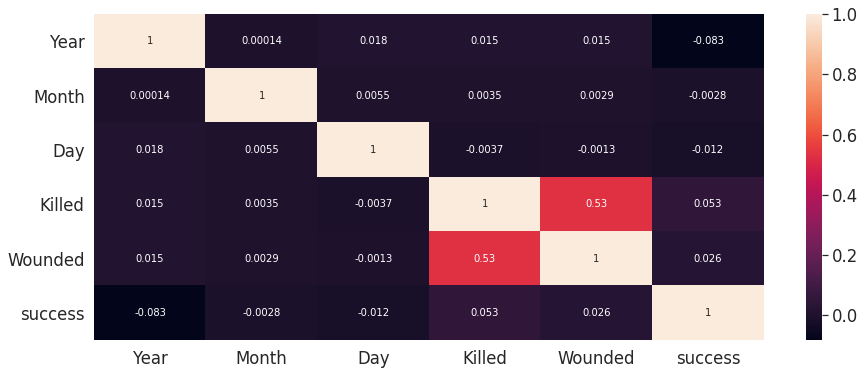

In [211]:
corr_df=terror_df[['Year','Month','Day','Killed','Wounded','success']]
corr=corr_df.corr()
plt.subplots(figsize=(15,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

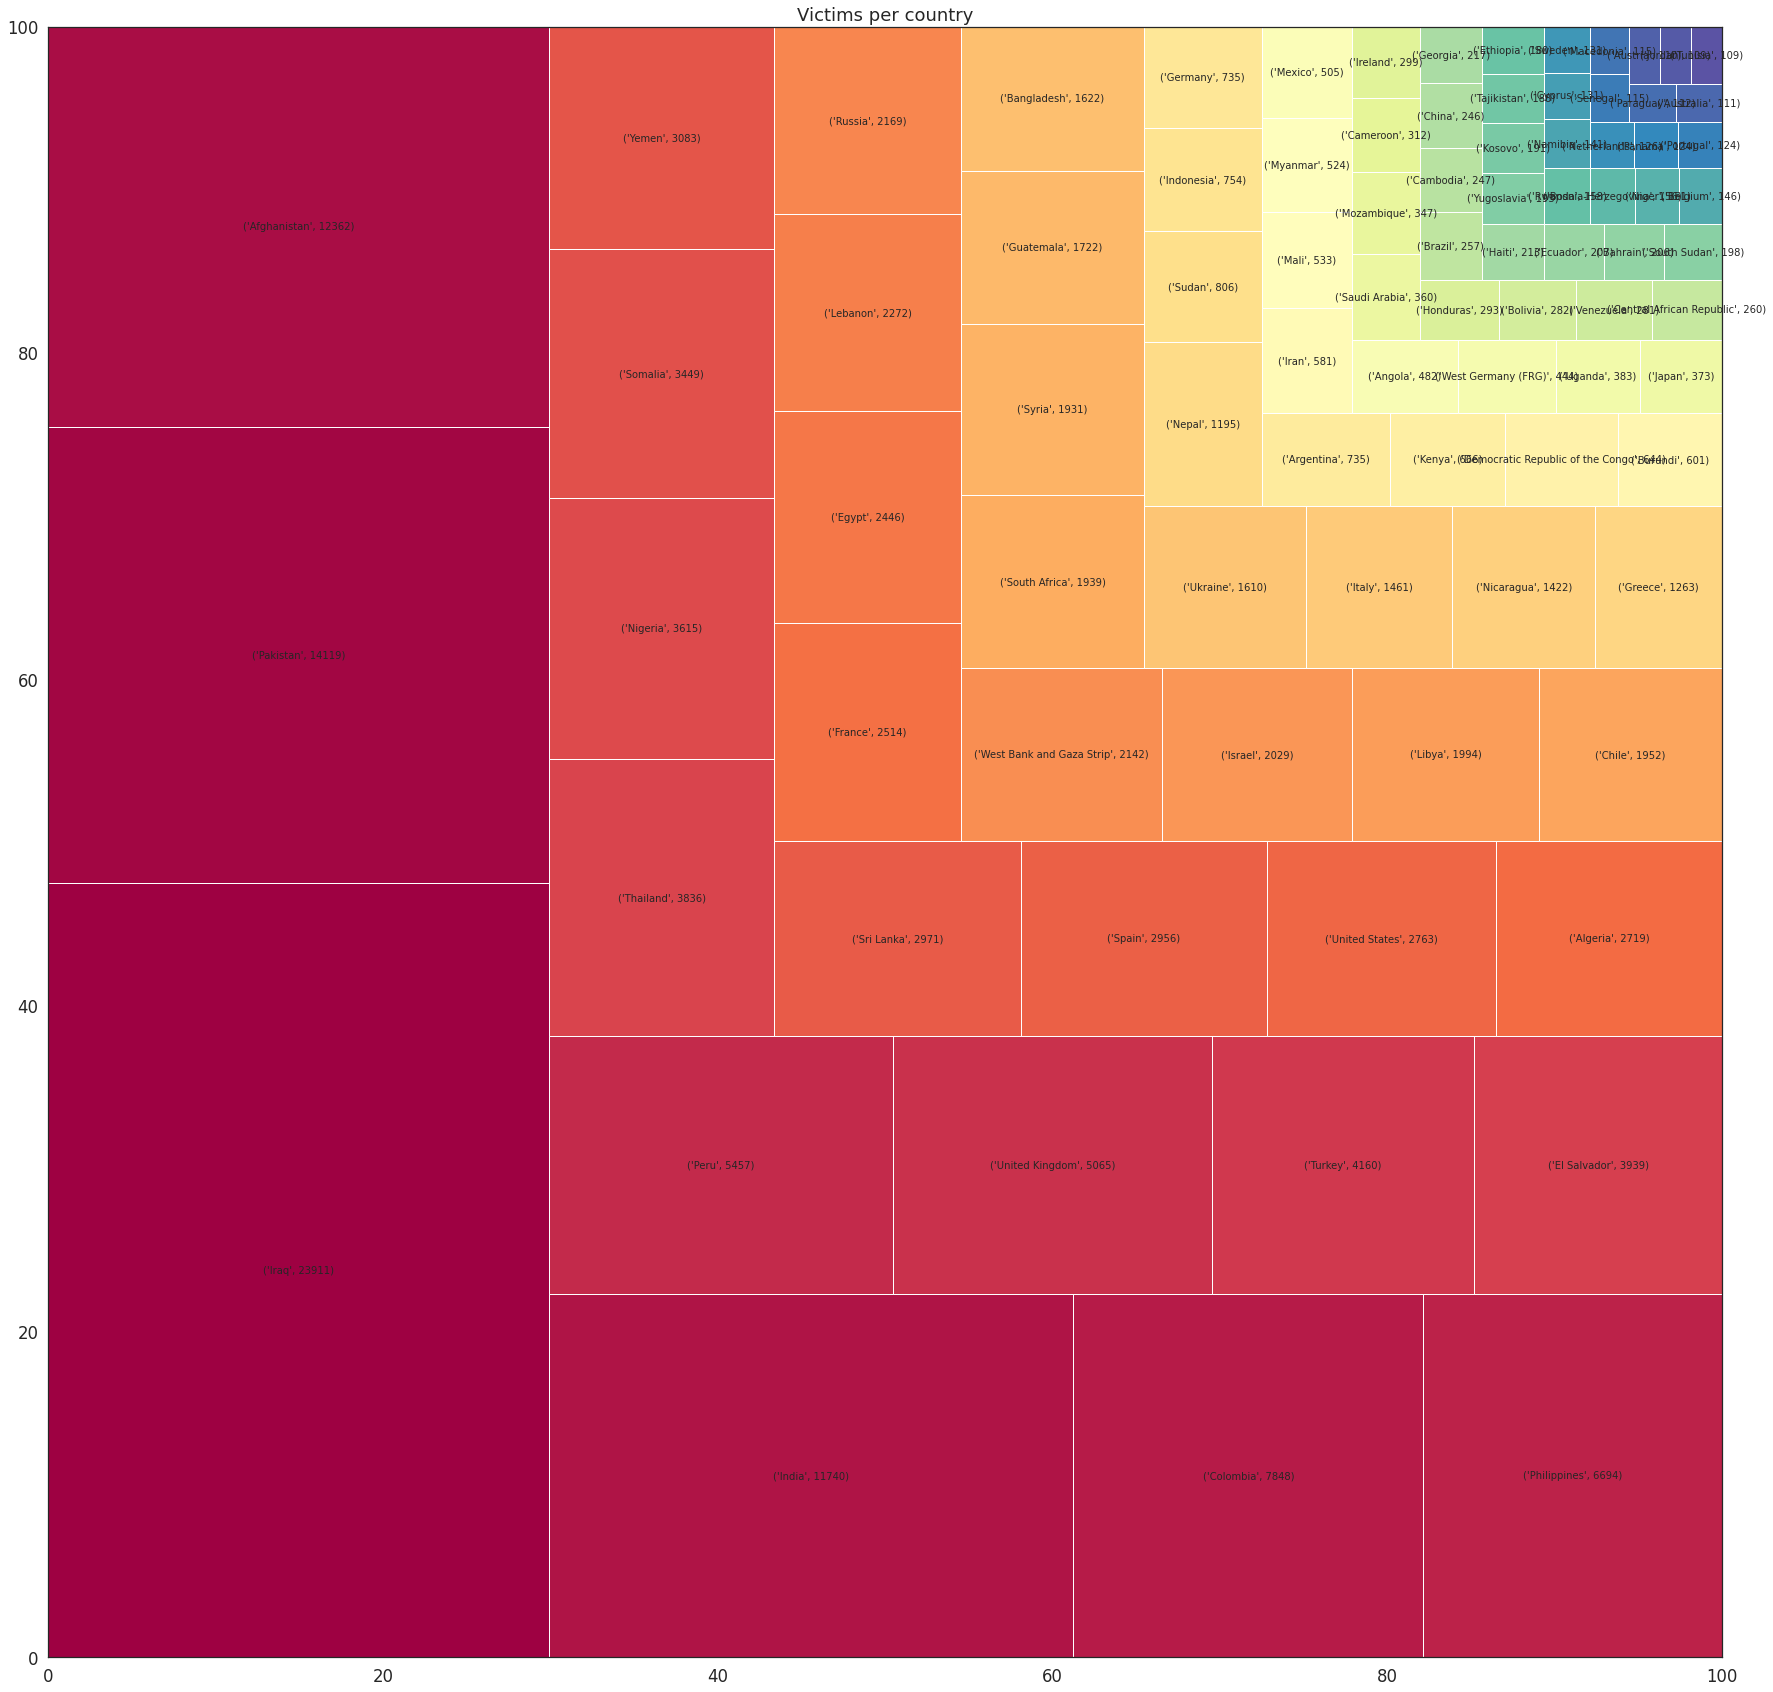

In [212]:
country_victims=terror.groupby('Country')['Killed'].count().reset_index().set_index('Country').sort_values('Killed',ascending=False)
country_victims=country_victims[country_victims['Killed']>100]

label_value = country_victims['Killed'].to_dict()

# create the labels using a list comprehesion
labels = [(key,value) for key, value in label_value.items() ]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# # ----------------------------------------------------------------------------------------------------
# # instanciate the figure
plt.figure(figsize = (30, 30))
plt.title("Victims per country")

# # ----------------------------------------------------------------------------------------------------
# # plot the data using squarify
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 1)

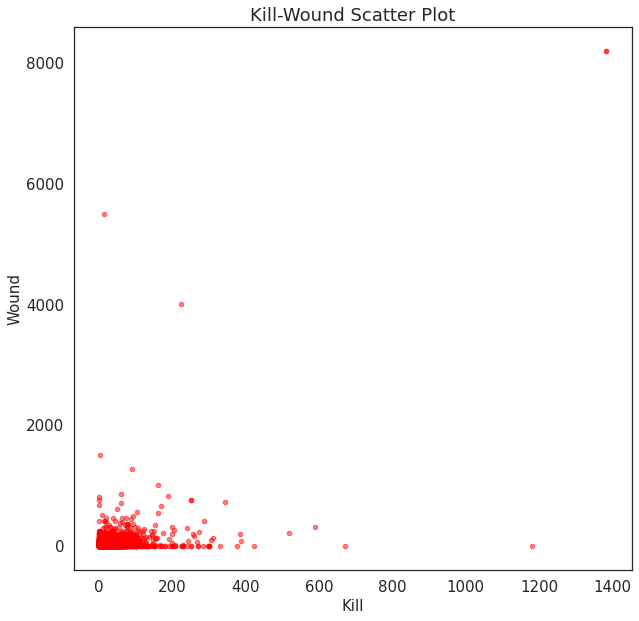

In [213]:
terror_df.plot(kind = 'scatter', x = 'Killed', y = 'Wounded', alpha = 0.5, color = 'red', figsize = (10,10), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill-Wound Scatter Plot')
plt.show()


In [214]:
# treemap(terror_df, 
#         index=c("Country"), 
#         vSize = "Killed",  
#         palette = "Reds",  
#         title="Killings in Global Terrorism",

# )

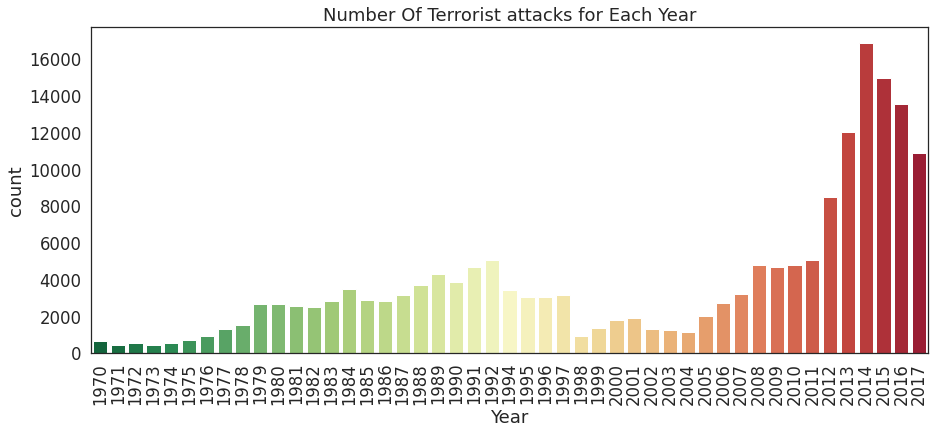

In [215]:

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist attacks for Each Year')
plt.show()

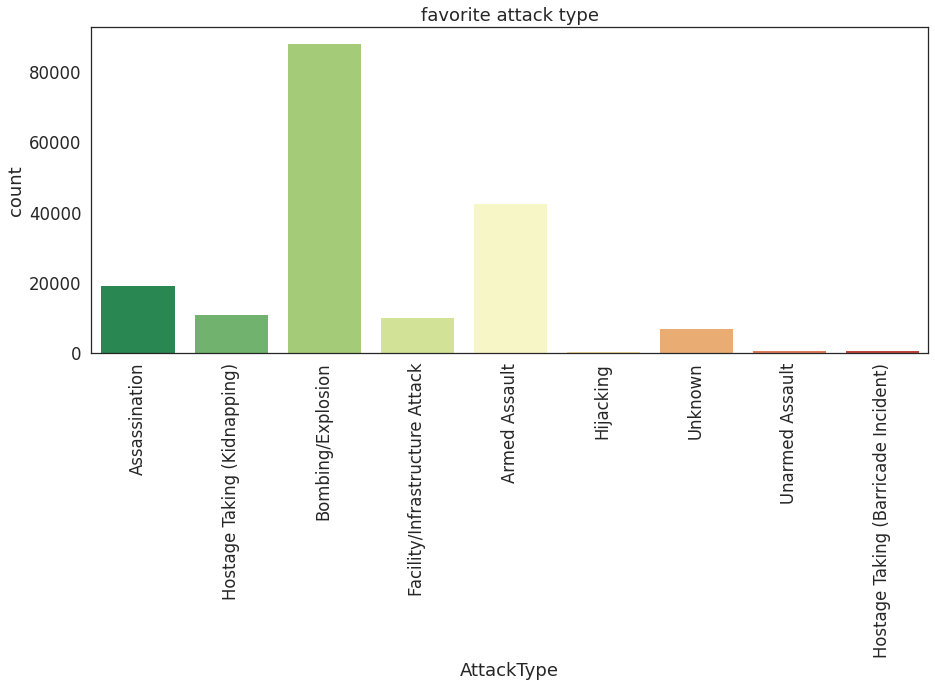

In [216]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('favorite attack type')
plt.show()

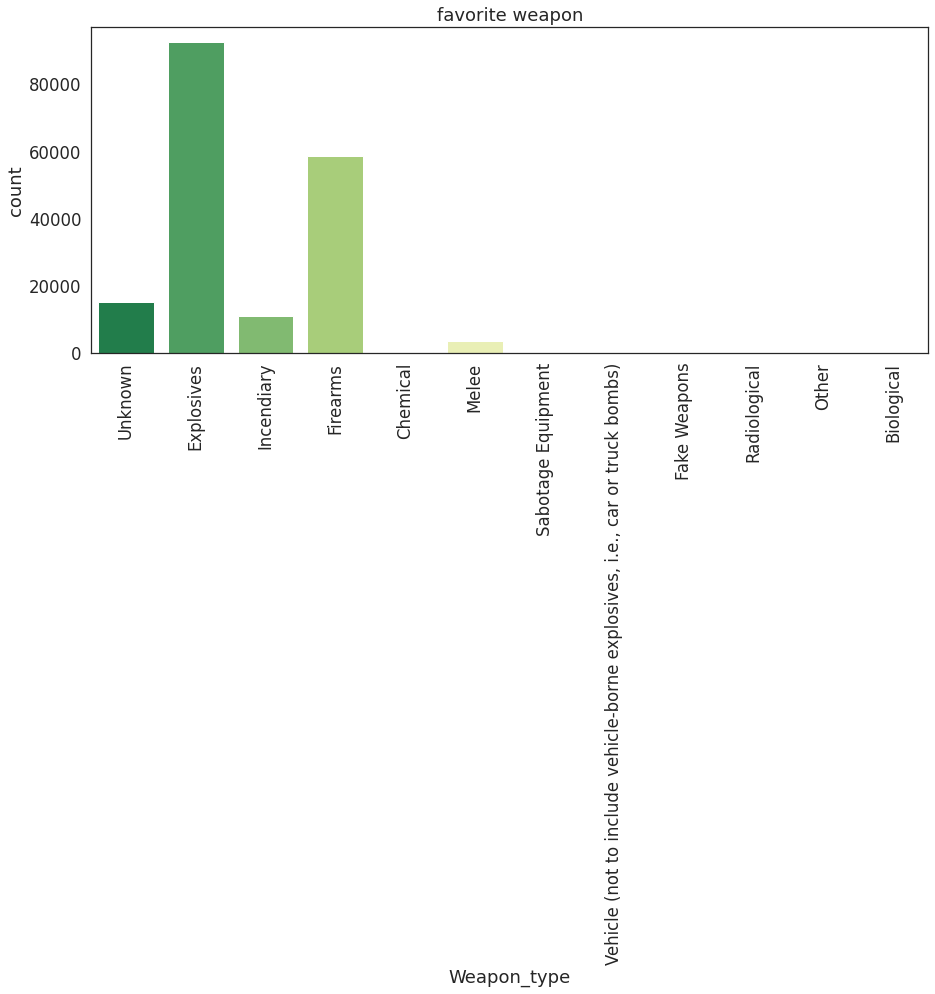

In [217]:
plt.subplots(figsize=(15,6))
sns.countplot('Weapon_type',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('favorite weapon')
plt.show()

In [218]:
# terror_fol=terror_df.copy()
# terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
# location_fol=terror_fol[['latitude','longitude']][5000:20000]  #depends on slicing it gives map
# country_fol=terror_fol['Country'][5000:20000]
# city_fol=terror_fol['city'][5000:20000]
# killed_fol=terror_fol['Killed'][5000:20000]
# wound_fol=terror_fol['Wounded'][5000:20000]
# def color_point(x):
#     if x>=30:
#         color='red'
#     elif ((x>0 and x<30)):
#         color='blue'
#     else:
#         color='green'
#     return color   
# def point_size(x):
#     if (x>30 and x<100):
#         size=2
#     elif (x>=100 and x<500):
#         size=8
#     elif x>=500:
#         size=16
#     else:
#         size=0.5
#     return size   
# map = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
# for point in location_fol.index:
#     info='<b>Country: </b>'+str(country_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
#     iframe = folium.IFrame(html=info, width=200, height=200)
#     folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map)
# map

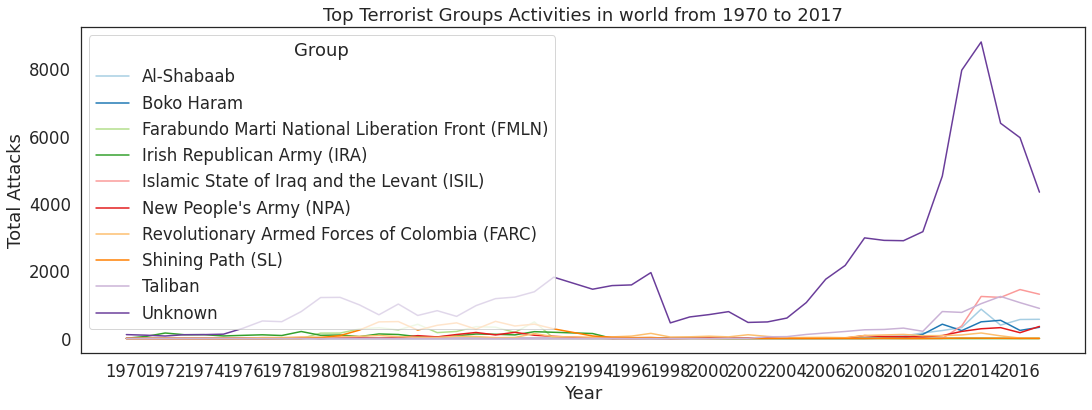

In [219]:
# global_attacks = terror_df[terror_df.Country=='Iraq'].reset_index()
global_groups_10 = terror_df[terror_df.Group.isin(terror_df.Group.value_counts()[0:10].index)]
pd.crosstab(global_groups_10.Year, global_groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017,2))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities in world from 1970 to 2017')
plt.show()

In [220]:
def global_attack_info(df):

  return(f"""
      There are {df.Country.nunique()} countries from {df.Region.nunique()} regions covered in the dataset and terrorist attacks data in {df.Year.nunique()}
      years from {df.Year.min()} to {df.Year.max()}. Overall {df.index.nunique()} terrorist attacks are recorded here which caused about {int(df.Casualities.sum())} casualities
      consisted of {int(df.Killed.sum())} kills and {int(df.Wounded.sum())} wounded.
  """)

In [221]:
print(global_attack_info(terror_df))


      There are 205 countries from 12 regions covered in the dataset and terrorist attacks data in 47
      years from 1970 to 2017. Overall 181691 terrorist attacks are recorded here which caused about 872892 casualities
      consisted of 411868 kills and 523869 wounded.
  


# **maximum attacked country-Iraq**

In [222]:
max_attack_year_df=terror_df[terror_df['Year']==2014]
max_attack_year_df

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,Casualities
125335,2014,1,1,Colombia,South America,Convencion,8.868790,-73.194094,Bombing/Explosion,0.0,0.0,Crude Oil Holding Pools,01/01/2014: Assailants detonated an explosive ...,National Liberation Army of Colombia (ELN),Utilities,Explosives,"The specific motive is unknown; however, sourc...",1,0.0
125336,2014,1,1,Somalia,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Bombing/Explosion,4.0,20.0,Hotel,01/01/2014: A suicide bomber detonated an expl...,Al-Shabaab,Business,Explosives,NaN,1,24.0
125337,2014,1,1,Pakistan,South Asia,Quetta,30.200819,66.994354,Bombing/Explosion,3.0,31.0,Shia Pilgrims,01/01/2014: A suicide bomber crashed an explos...,Jaish-e-Islam,Private Citizens & Property,Explosives,Jaish-e-Islam claimed responsibility for the i...,1,34.0
125338,2014,1,1,Pakistan,South Asia,Dera Bugti,29.034412,69.158661,Bombing/Explosion,0.0,0.0,Unknown,01/01/2014: A land mine was found and defused ...,Unknown,Unknown,Explosives,NaN,0,0.0
125339,2014,1,1,Somalia,Sub-Saharan Africa,Buale,1.097128,42.598368,Hostage Taking (Kidnapping),NaN,NaN,Aid Workers,01/01/2014: Assailants abducted ten individual...,Al-Shabaab,NGO,Unknown,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142236,2014,12,31,Algeria,Middle East & North Africa,Algiers,36.763763,3.055413,Bombing/Explosion,0.0,0.0,Unknown,12/31/2014: Security forces identified and arr...,Unknown,Unknown,Explosives,NaN,0,0.0
142237,2014,12,31,Indonesia,Southeast Asia,Lembah Napu,-1.753123,120.643559,Hostage Taking (Kidnapping),1.0,0.0,Civilian,12/31/2014: Assailants abducted a local reside...,Mujahidin Indonesia Timur (MIT),Private Citizens & Property,Unknown,NaN,1,1.0
143507,2014,12,27,Afghanistan,South Asia,Saberi district,33.566561,69.878354,Bombing/Explosion,5.0,0.0,Civilians,12/27/2014: An explosive device detonated in S...,Taliban,Private Citizens & Property,Explosives,NaN,1,5.0
143727,2014,12,31,Philippines,Southeast Asia,Mlang,6.946661,124.880331,Bombing/Explosion,2.0,32.0,Market,12/31/2014: An explosive device detonated in a...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Explosives,NaN,1,34.0


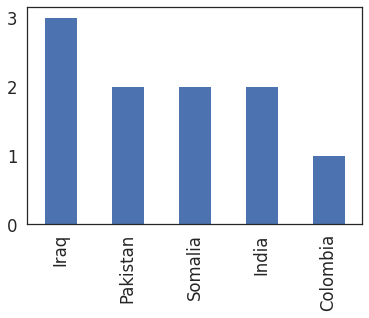

In [223]:
max_attack_year_df['Country'][0:10].value_counts().plot(kind='bar')

In [224]:
max_attacks_country=max_attack_year_df.loc[terror_df['Killed'].idxmax()].Country
max_attacks_country

'Iraq'

In [225]:
Iraq_df=max_attack_year_df[max_attack_year_df['Country']==max_attacks_country].reset_index()
Iraq_df.head()

,index,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,Casualities
0,125340,2014,1,1,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,Bombing/Explosion,2.0,6.0,Patrol,01/01/2014: A suicide bomber detonated an expl...,Unknown,Military,Explosives,NaN,1,8.0
1,125341,2014,1,1,Iraq,Middle East & North Africa,Yathrib,33.994591,44.357273,Armed Assault,2.0,3.0,Checkpoint,01/01/2014: Assailants opened fire on a milita...,Unknown,Military,Firearms,NaN,1,5.0
2,125342,2014,1,1,Iraq,Middle East & North Africa,Tarmiyah,33.669689,44.381317,Armed Assault,4.0,12.0,Police Station,01/01/2014: Assailants stormed a police statio...,Muslim extremists,Police,Firearms,"The specific motive is unknown; however, sourc...",1,16.0
3,125347,2014,1,1,Iraq,Middle East & North Africa,Fallujah,33.349159,43.784199,Armed Assault,0.0,0.0,Headquarters,01/01/2014: Assailants stormed police headquar...,Islamic State of Iraq and the Levant (ISIL),Police,Firearms,"The specific motive is unknown; however, sourc...",1,0.0
4,125348,2014,1,1,Iraq,Middle East & North Africa,Fallujah,33.349159,43.784199,Armed Assault,1.0,0.0,Police Station,01/01/2014: Assailants stormed police station ...,Islamic State of Iraq and the Levant (ISIL),Police,Firearms,"The specific motive is unknown; however, sourc...",1,1.0


In [226]:
Iraq_df['Region'].value_counts()

Middle East & North Africa    3933
Name: Region, dtype: int64

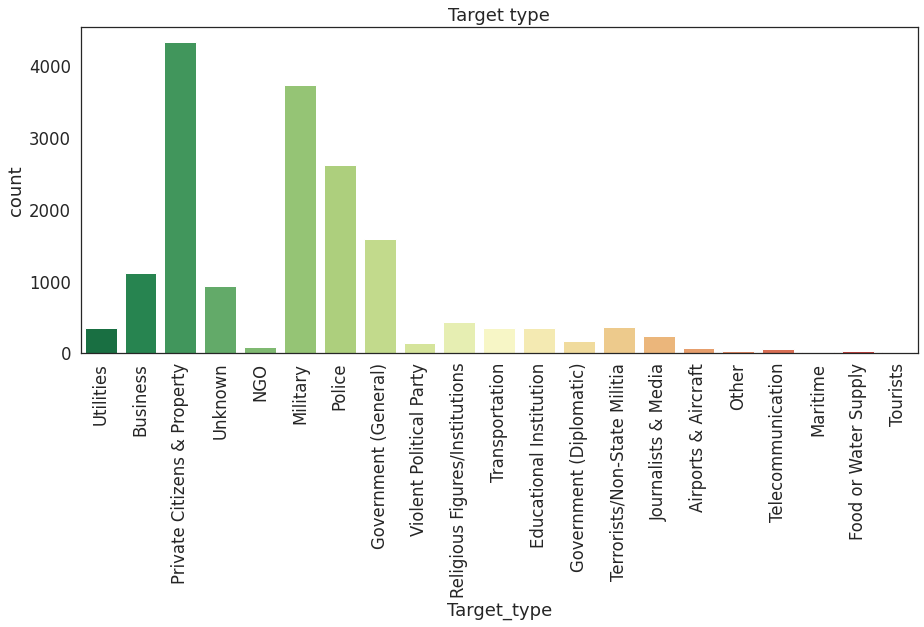

In [227]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=max_attack_year_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Target type')
plt.show()

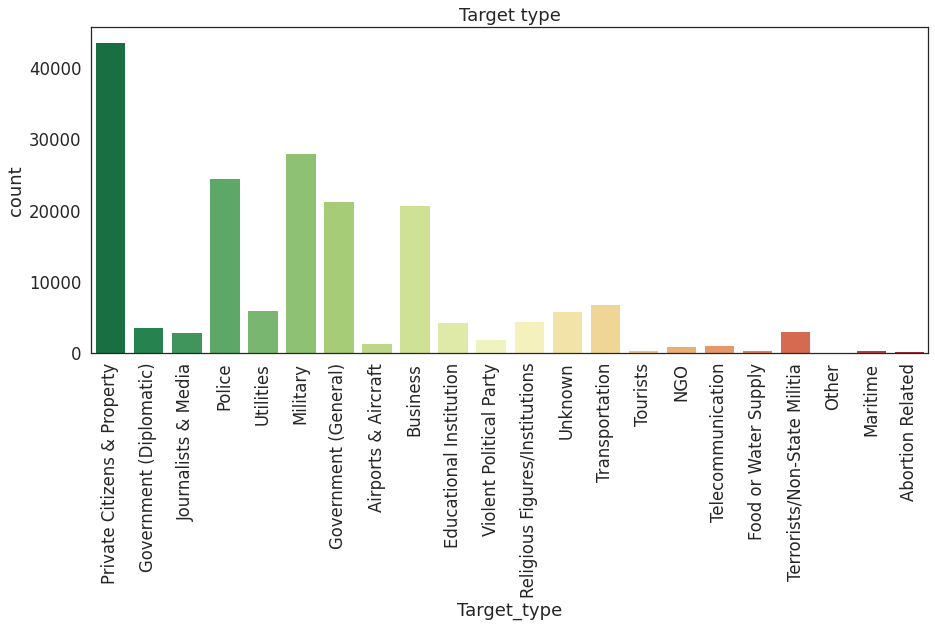

In [228]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Target type')
plt.show()

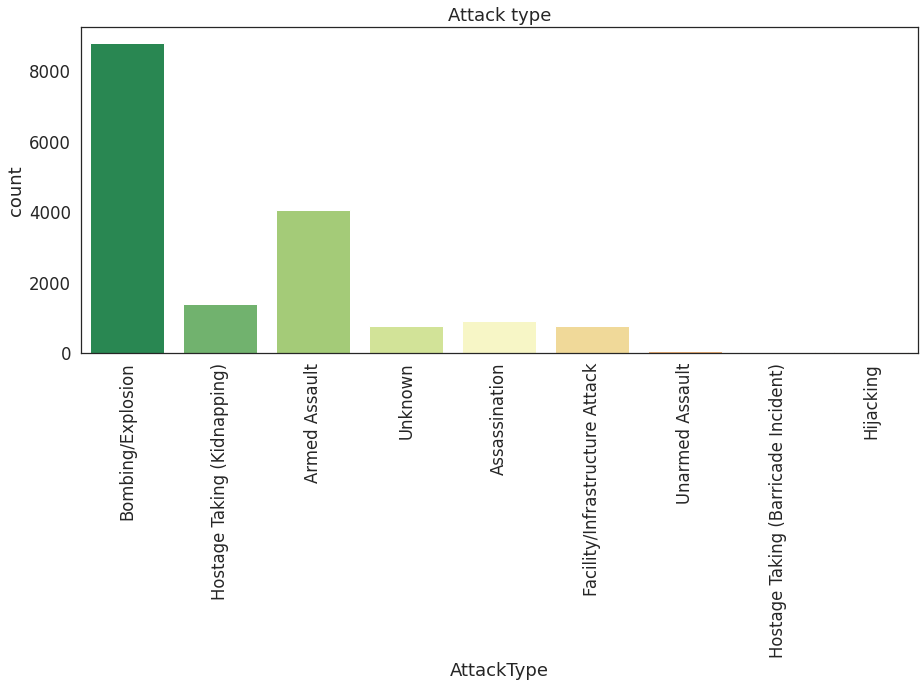

In [229]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=max_attack_year_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Attack type')
plt.show()

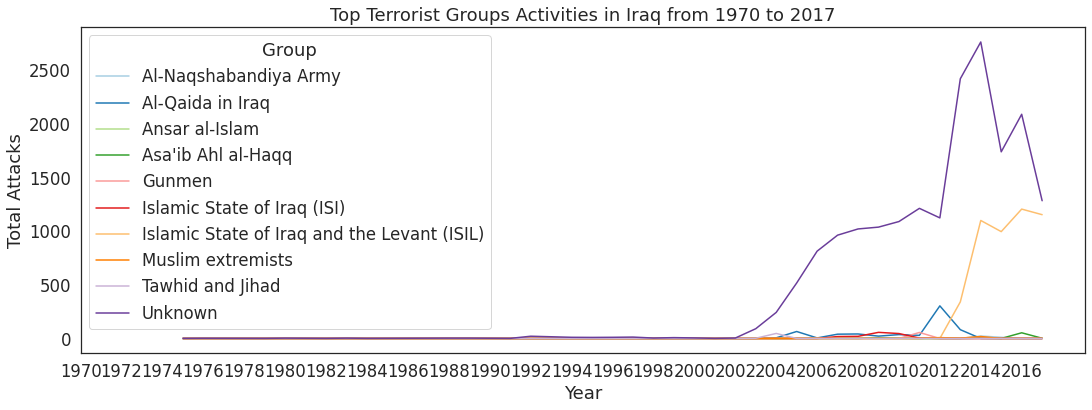

In [230]:
iraq_attacks = terror_df[terror_df.Country=='Iraq'].reset_index()
Iraq_groups_10 = iraq_attacks[iraq_attacks.Group.isin(iraq_attacks.Group.value_counts()[0:10].index)]
pd.crosstab(Iraq_groups_10.Year, Iraq_groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017,2))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities in Iraq from 1970 to 2017')
plt.show()

# Some Analysis based on Country

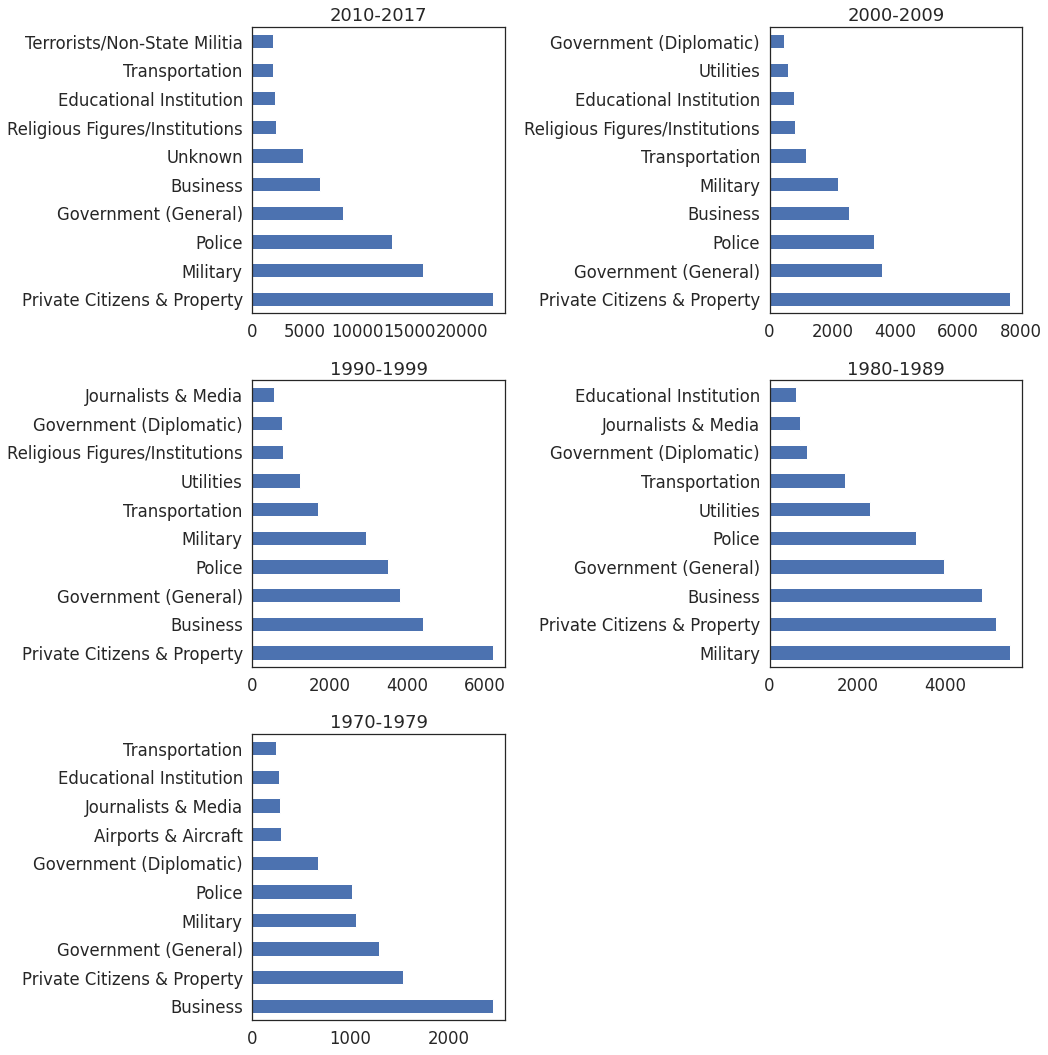

In [231]:
def plot_by_years(kind='region_txt',big=(15,15)):
    """
    This function will return us the plots as per the
    kind of data we expect.
    input: type of information
    output: bar plots with year intervals
    """ 
    sns.set(style="white",font_scale=1.5)
    fig = plt.figure(figsize=big)
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title('2010-2017')
    ax1.set_ylabel('')
    terror[terror['Year']>=2010]['eventid'].groupby(terror[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax1.set_ylabel('')
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title('2000-2009')
    terror[(terror['Year']>=2000) & (terror['Year']<2010)]['eventid'].groupby(terror[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax2.set_ylabel('')
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title('1990-1999')
    terror[(terror['Year']>=1990) & (terror['Year']<2000)]['eventid'].groupby(terror[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax3.set_ylabel('')
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title('1980-1989')
    terror[(terror['Year']>=1980) & (terror['Year']<1990)]['eventid'].groupby(terror[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax4.set_ylabel('')
    ax4 = fig.add_subplot(3,2,5)
    ax4.set_title('1970-1979')
    terror[(terror['Year']>=1970) & (terror['Year']<1980)]['eventid'].groupby(terror[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    plt.tight_layout()
    plt.ylabel('');
plot_by_years(kind='Target_type',big=(15,15))

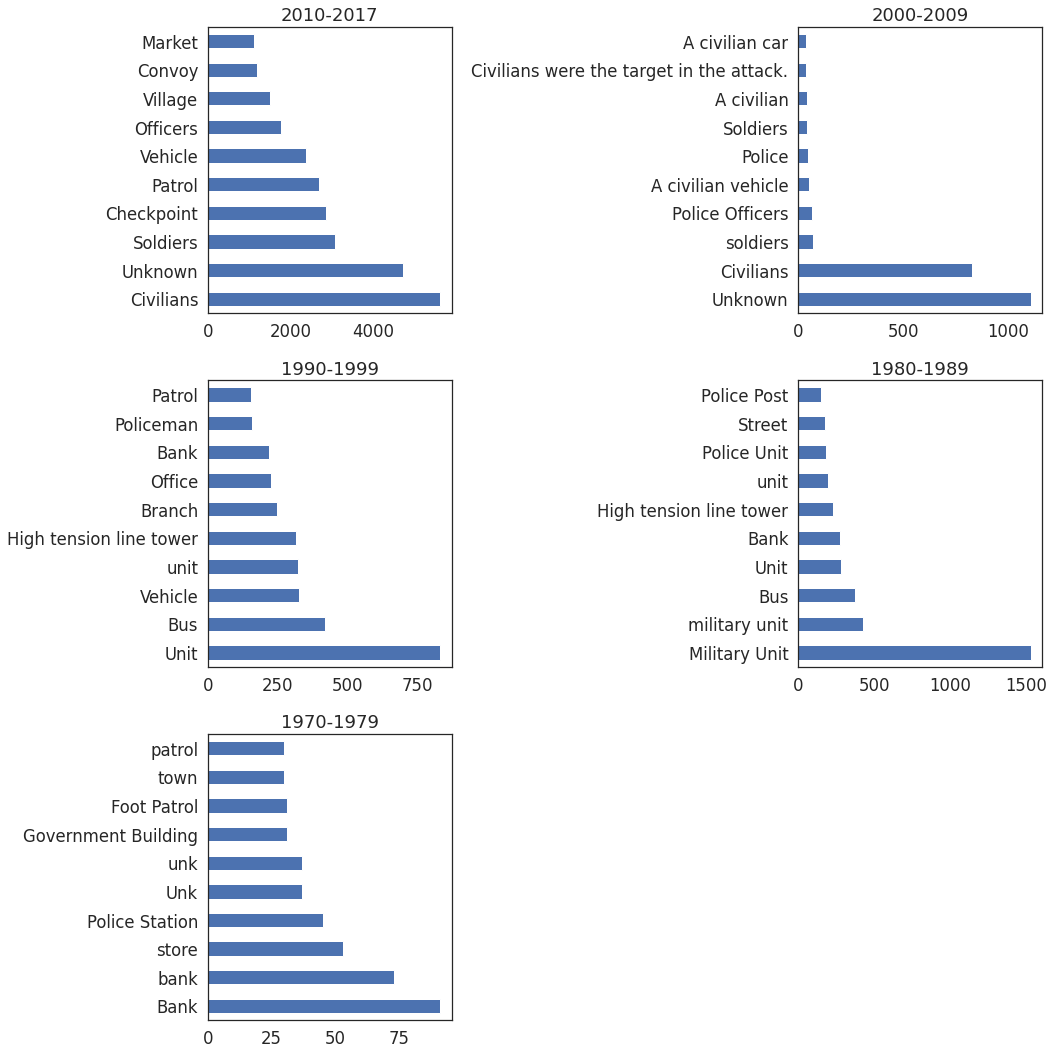

In [232]:
plot_by_years(kind='Target',big=(15,15))

In [233]:
def country_analysis(country_name, data):
    """
    This function creates a dashboard with informations of terrorism in a certain country.
    Input:
        The function receives the name of the country, the dataset and color configuration
    Output:
        It returns a 4 plot dashboard.
    """
    # Assigning
    country = data[data['Country'] == country_name]
    country_cities = country.groupby(by='city', as_index=False).count().sort_values('eventid',ascending=False).iloc[:5, :2] 
                                                                                   
    succeed_size = country['success'].sum() / len(country)
    labels = ['Succeed', 'Not Succeed']
    
    country_year = country.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]
    country_weapon = country.groupby(by='Weapon_type', as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2] 

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    # Plot 1 - Top 5 terrorism cities
    sns.barplot(x='eventid', y='city', data=country_cities, ci=None, ax=axs[0, 0])
    axs[0, 0].set_title(f'Top 5 {country_name} Cities With Most Terrorism Occurences')
    axs[0, 0].set_ylabel('City')
    axs[0, 0].set_xlabel('Victims')

    # plot 2 - Suicide rate
    center_circle = plt.Circle((0,0), 0.75, color='white')
    axs[0, 1].pie((succeed_size, 1-succeed_size), labels=labels,autopct='%1.1f%%')
    axs[0, 1].add_artist(center_circle)
    axs[0, 1].set_title(f'Terrorism succeed Rate {country_name}')
    
    # Plot 3 - Victims through the years
    sns.lineplot(x='Year', y='Killed', data=country_year, ax=axs[1, 0])
    axs[1, 0].set_xlim([1970, 2017])
    axs[1, 0].set_title(f'Number of Victims Over Time in {country_name}')
    axs[1, 0].set_ylabel('Victims')
    
    # Plot 4 - Terrorism Weapons
    sns.barplot(x='Weapon_type', y='eventid', data=country_weapon, ci=None, ax=axs[1, 1])
    axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
    axs[1, 1].set_xlabel('')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].set_title(f'Weapons Used in Attacks in {country_name}')
       
    plt.tight_layout()
    plt.subplots_adjust()
    plt.show()

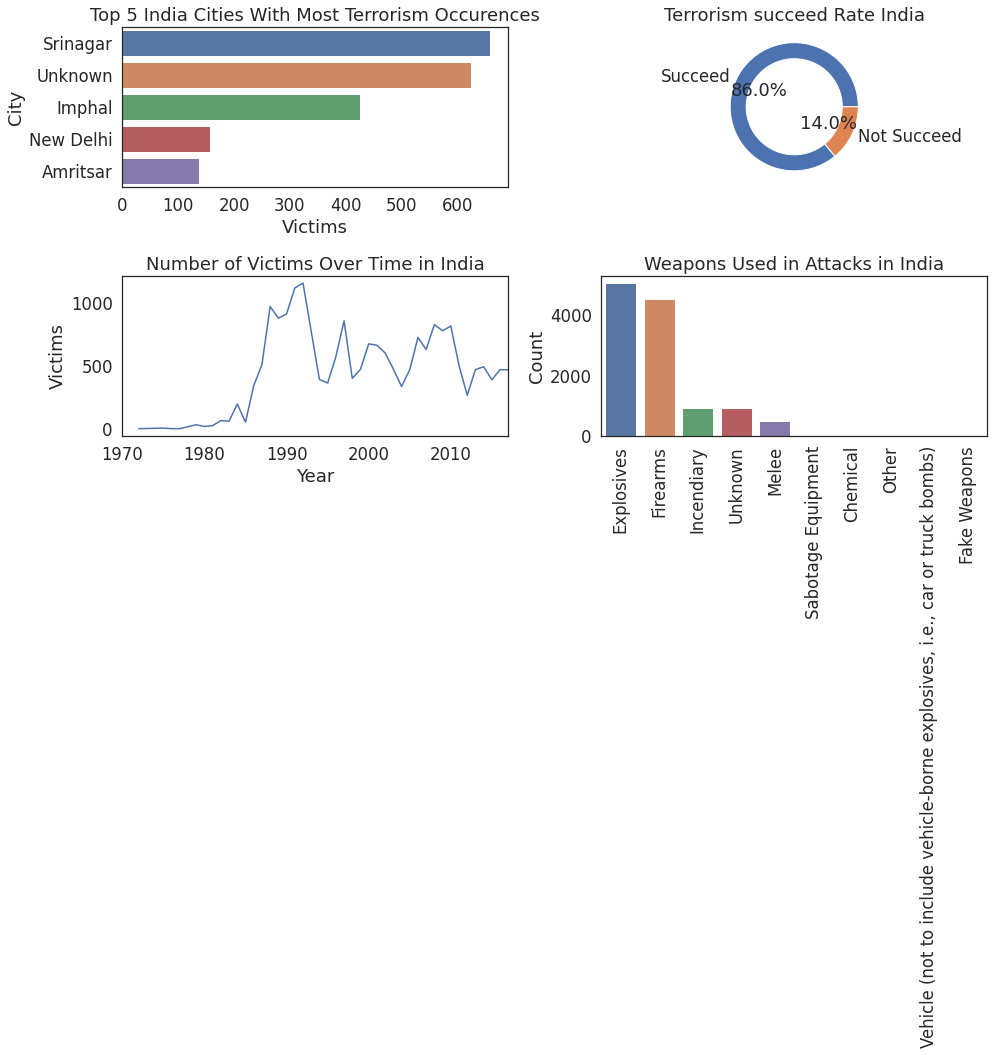

In [234]:
country_analysis('India',terror)

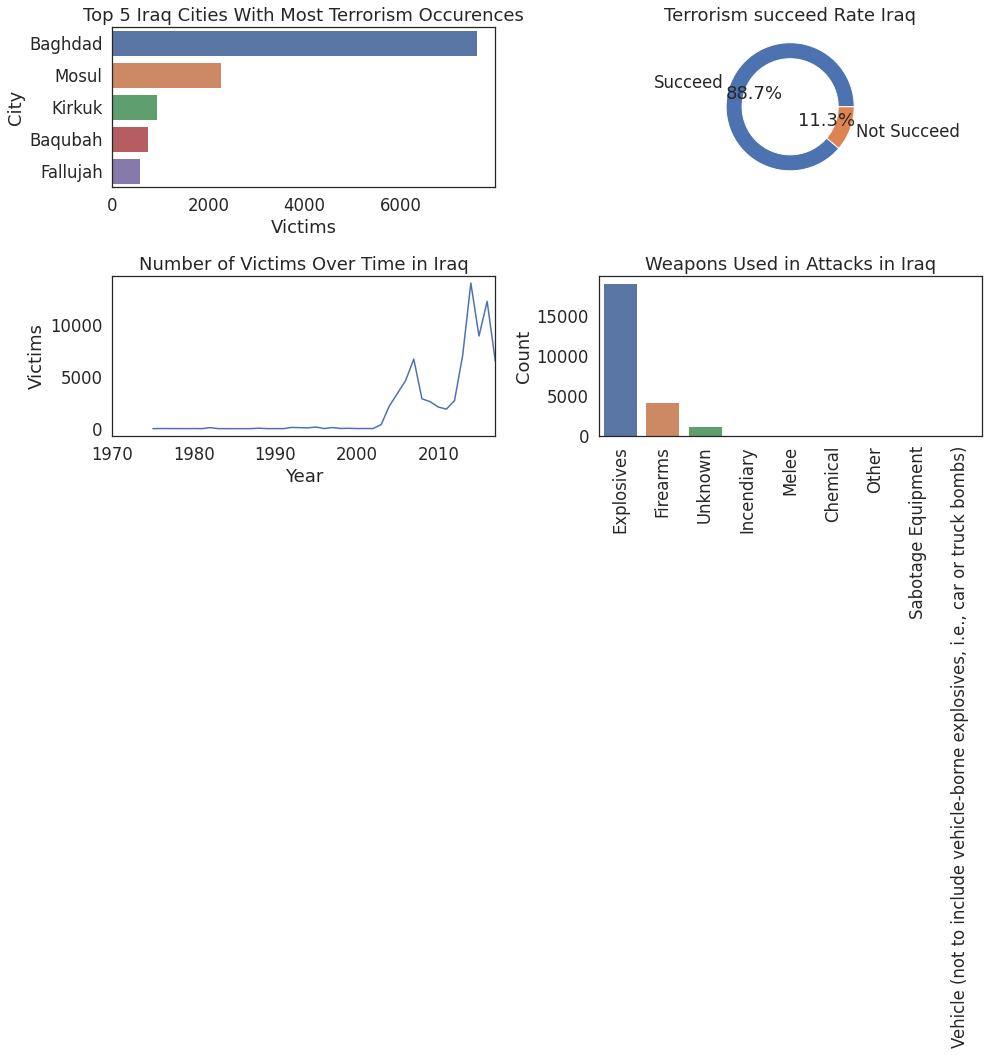

In [235]:
country_analysis('Iraq',terror)

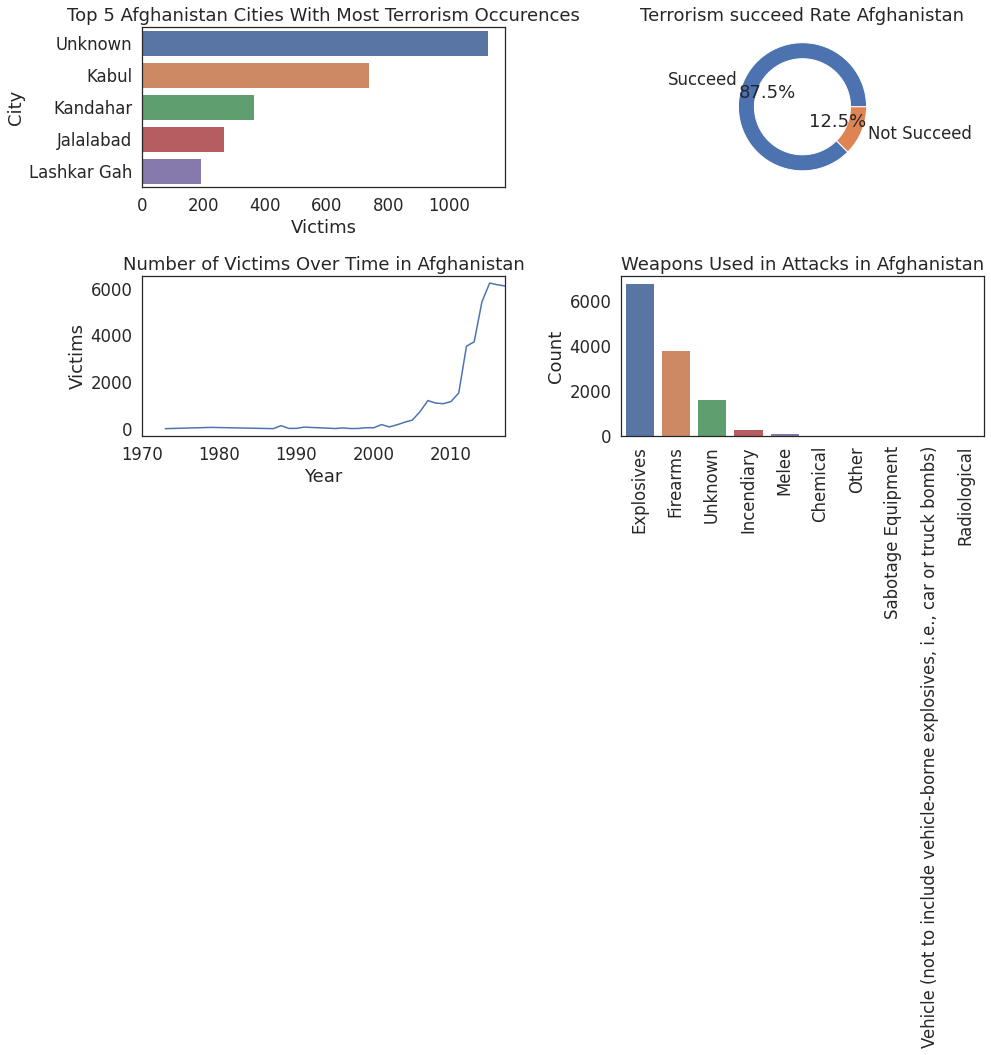

In [236]:
country_analysis('Afghanistan',terror)

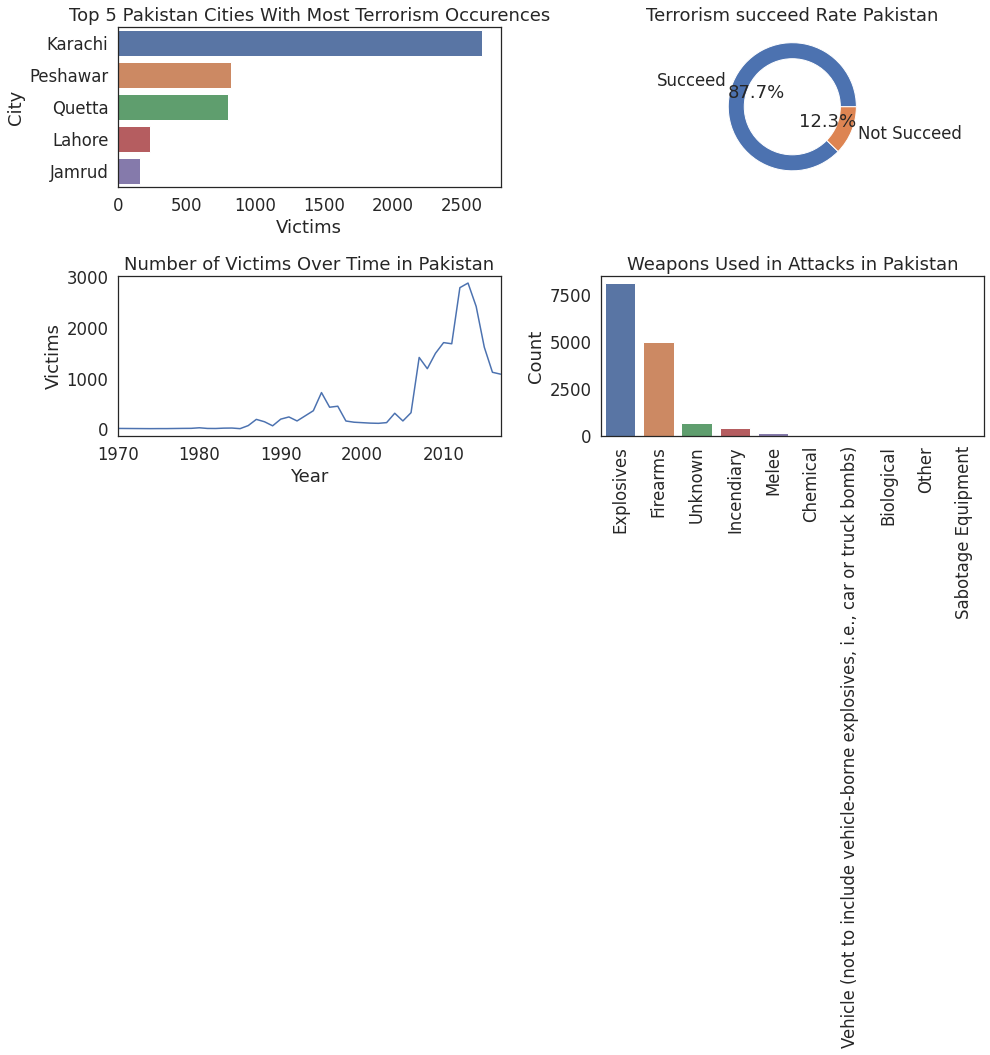

In [237]:
country_analysis('Pakistan',terror)

In [238]:
suicide_df=terror.groupby('Country')['suicide'].count().reset_index().set_index('Country').sort_values('suicide',ascending=False)[0:5]
suicide_df

,suicide
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


Text(0, 0.5, 'count')

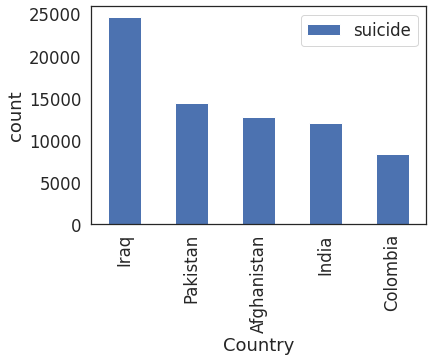

In [239]:
suicide_df.plot(kind='bar')
plt.ylabel('count')

In [240]:
#suicide rate in India
India_df=terror[terror['Country']=='India']
India_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,...,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,...,NaN,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,...,NaN,NaN,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,146.0,9.0,NaN,NaN,Algeria,Algeria,1.0,6000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
7337,197901130004,1979,1,13,NaN,0,NaN,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,...,NaN,NaN,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [241]:
suicide=India_df.groupby(['Year'])['suicide'].count().reset_index()
suicide.sort_values('suicide',ascending=False)[0:5]

,Year,suicide
40,2016,1025
41,2017,966
39,2015,884
38,2014,860
37,2013,694


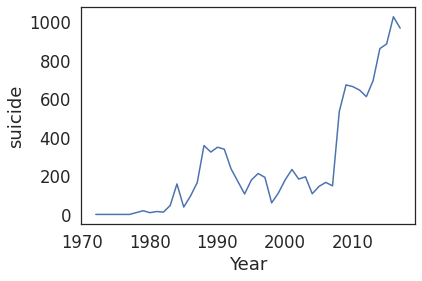

In [242]:
sns.lineplot(data=suicide, x="Year", y="suicide")

In [243]:
city_suicide=India_df.groupby('city')['suicide'].count().reset_index().sort_values('suicide',ascending=False)[0:5]
city_suicide

,city,suicide
4279,Srinagar,658
4619,Unknown,624
1758,Imphal,426
3312,New Delhi,157
90,Amritsar,138


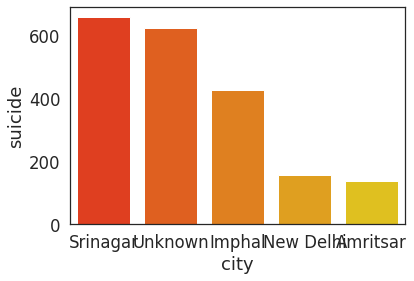

In [244]:
sns.barplot(x='city', y='suicide', data=city_suicide, ci=None,
                 palette='autumn')

In [245]:
city_suicide1=India_df.groupby('city')['suicide'].count().reset_index().set_index('city').sort_values('suicide',ascending=False)[0:5]
city_suicide1

,suicide
city,
Srinagar,658
Unknown,624
Imphal,426
New Delhi,157
Amritsar,138


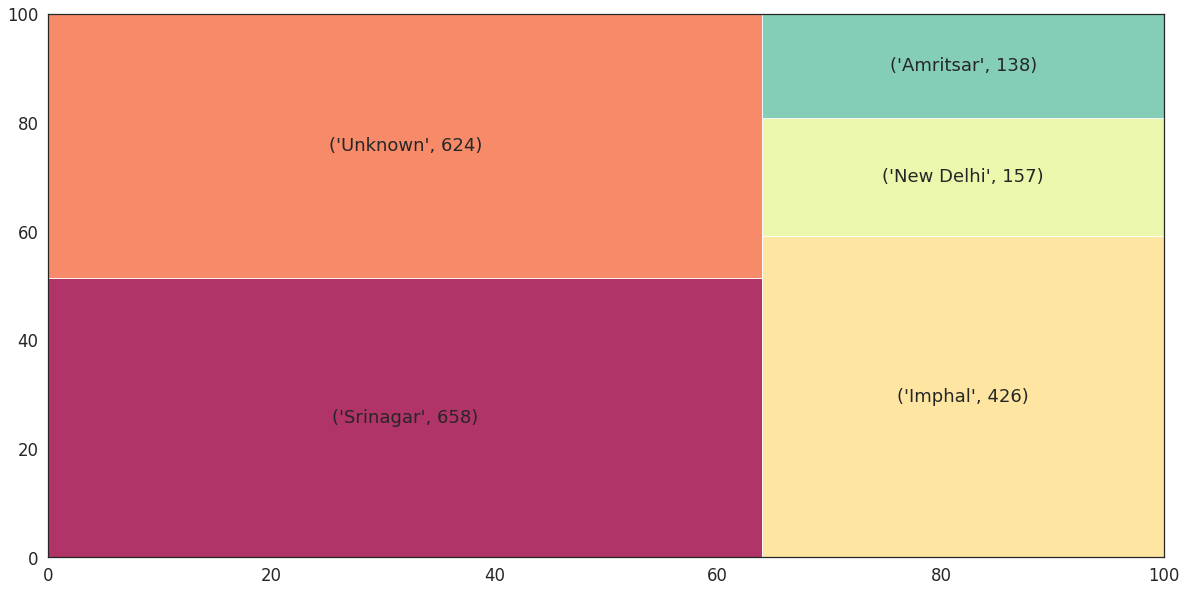

In [246]:
label_value = city_suicide1['suicide'].to_dict()
# label_value
# create the labels using a list comprehesion
labels = [(key,value) for key, value in label_value.items()]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (20, 10))

# ----------------------------------------------------------------------------------------------------
# plot the data using squarify
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)

# ----------------------------------------------------------------------------------------------------

In [247]:
def country_victims(country,big=(10,10)):
  country_df=terror[terror['Country']==country]
  India_victims=country_df.groupby('city')['Killed'].count().reset_index().set_index('city').sort_values('Killed',ascending=False)
  India_victims=India_victims[India_victims['Killed']>100]

  label_value = India_victims['Killed'].to_dict()

  # create the labels using a list comprehesion
  labels = [(key,value) for key, value in label_value.items() ]

  # create n colors based on the number of labels we have
  colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

  # # ----------------------------------------------------------------------------------------------------
  # # instanciate the figure
  plt.figure(figsize = big)
  plt.title(f"Victims per city in {country}")

  # # ----------------------------------------------------------------------------------------------------
  # # plot the data using squarify
  squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.75)

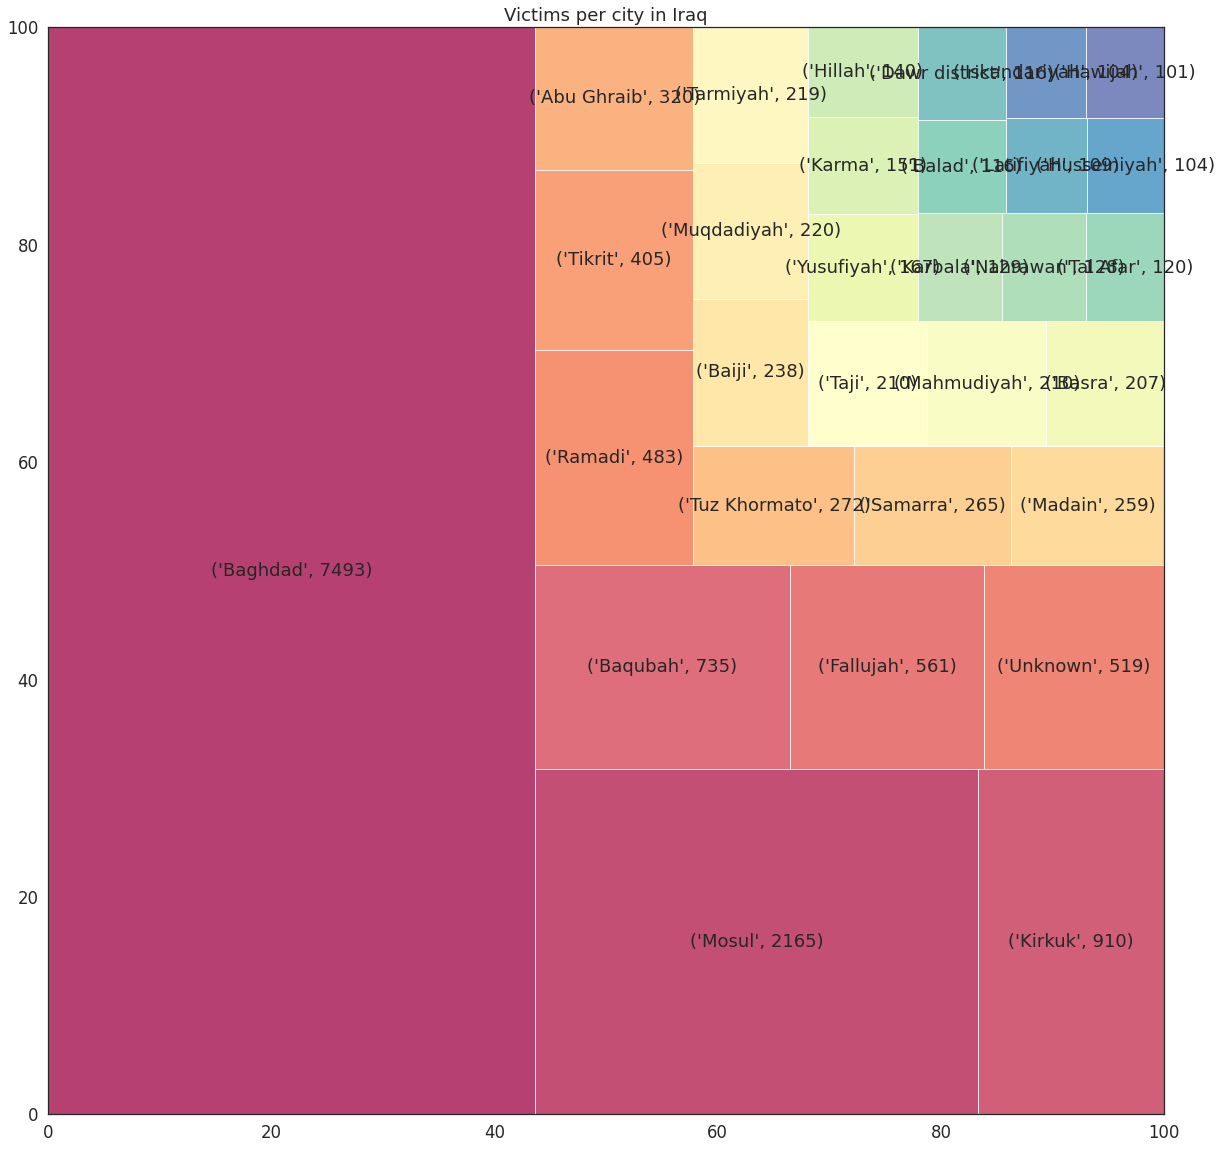

In [248]:
country_victims('Iraq',(20,20))

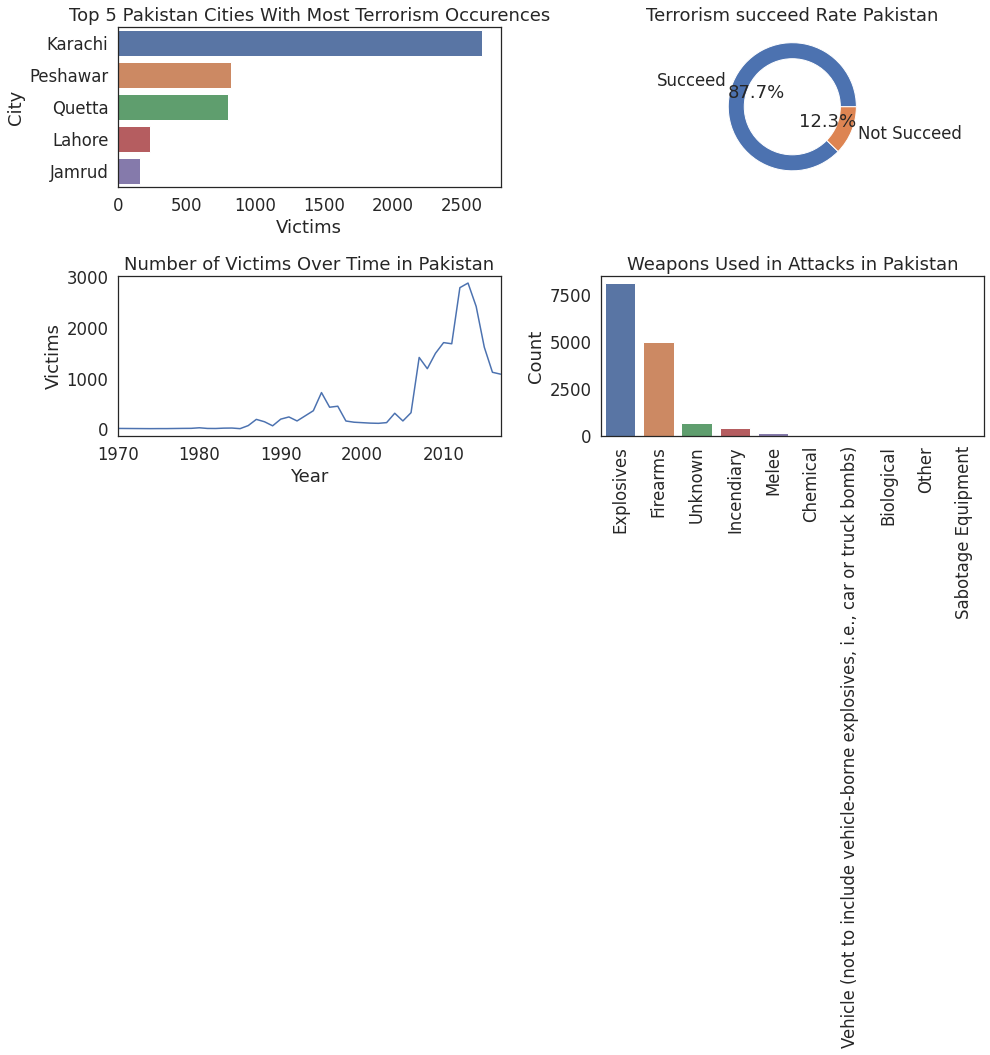

In [249]:
country_analysis('Pakistan',terror)